'spe' (Spectroscopic) Dataset
========================

Setup
--------

As a preparatory task, we create a file `Spe.dat`, containing common spectroscopic data. Apart from times, we also need wavelengths. For simplicity, the "observed" flux was set to 1.0. Of course, in real life this value is observed (between 0 and 1), as read from FITS files.

In [1]:
f = open("Spe.dat", "w")
f.write("# time wavelength flux sigma\n")

t = 0.25            # d
wave1 = 6500.0e-10  # m
wave2 = 6600.0e-10  # m
dwave = 0.1e-10     # m
flux = 1.0          # 1
sigma = 0.01        # 1
    
wave = wave1
while wave < wave2+0.5*dwave:
    f.write("%.8f  %.8e  %.8f  %.8f\n" % (t, wave, flux, sigma))
    wave += dwave
    
f.close()

Modelling of spectra requires a grid of <i>normalized</i> synthetic spectra (usually, >>10 GB). Here, a tiny 'test' grid will be used, so that this tutorial works without any installation; it is set up by the <tt>gridlist</tt> file, located in the current directory. Each file contains a single spectrum (wavelength in A, normalized flux in 1).

```
# filename Teff logg Z mu
grids/TEST/AG05750g400v1.vis.1  5750 4.0 1.0 1.0
grids/TEST/AG05750g450v1.vis.1  5750 4.5 1.0 1.0
grids/TEST/AG06000g400v1.vis.1  6000 4.0 1.0 1.0
grids/TEST/AG06000g450v1.vis.1  6000 4.5 1.0 1.0
grids/TEST/AG06250g400v1.vis.1  6250 4.0 1.0 1.0
grids/TEST/AG06250g450v1.vis.1  6250 4.5 1.0 1.0
```

Note: Make sure to have the latest version of PHOEBE 2.5 installed (uncomment this line if running in an online notebook session such as colab).

In [2]:
#!pip install -I "phoebe>=2.5,<2.6"

As always, let's do imports and add a new Bundle.

In [3]:
import phoebe

b = phoebe.default_binary()

Parameters
----------------

Next read `Spe.dat` back and add the corresponding 'spe' dataset:

In [4]:
import numpy as np

times, wavelengths, fluxes, sigmas = np.loadtxt("Spe.dat", usecols=[0, 1, 2, 3], unpack=True)

b.add_dataset('spe', times=times, wavelengths=wavelengths, fluxes=fluxes, sigmas=sigmas, passband="Johnson:R")

<ParameterSet: 44 parameters | contexts: dataset, figure, compute>

To verify:

In [5]:
print(b.get_dataset(kind='spe'))

ParameterSet: 10 parameters
              times@spe01@dataset: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
        wavelengths@spe01@dataset: [6.5000e-07 6.5001e-07 6.5002e-07 ...
 6.5998e-07 6.5999e-07 6.6000e-07] m
             fluxes@spe01@dataset: [1. 1. 1. ... 1. 1. 1.]
      compute_times@spe01@dataset: [] d
             sigmas@spe01@dataset: [0.01 0.01 0.01 ... 0.01 0.01 0.01]
         spe_method@spe01@dataset: integrate
           passband@spe01@dataset: Johnson:R
   intens_weighting@spe01@dataset: energy
    ld_mode@primary@spe01@dataset: interp
   ld_mode@secondary@spe01@dat...: interp


### times
To see explanations:

In [6]:
print(b.get_parameter(kind='spe', qualifier='times', context='dataset'))

Parameter: times@spe01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### wavelengths
Alternatively, one can use the `twig` syntax.

In [7]:
print(b['wavelengths@spe01@spe@dataset'])

Parameter: wavelengths@spe01@dataset
                       Qualifier: wavelengths
                     Description: Observed wavelengths
                           Value: [6.5000e-07 6.5001e-07 6.5002e-07 ... 6.5998e-07 6.5999e-07
 6.6000e-07] m
                  Constrained by: 
                      Constrains: None
                      Related to: None



### fluxes

In [8]:
print(b['fluxes@spe01@spe@dataset'])

Parameter: fluxes@spe01@dataset
                       Qualifier: fluxes
                     Description: Observed fluxes
                           Value: [1. 1. 1. ... 1. 1. 1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [9]:
print(b['sigmas@spe01@spe@dataset'])

Parameter: sigmas@spe01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty of flux
                           Value: [0.01 0.01 0.01 ... 0.01 0.01 0.01]
                  Constrained by: 
                      Constrains: None
                      Related to: None



### spe_method
One can choose either a simple model, assuming a uniform disk(s), or a complex model, with integration over meshes --- i.e., applicable to contact or eclipsing binaries.

In [10]:
print(b.get_parameter(qualifier='spe_method', context='dataset'))

Parameter: spe_method@spe01@dataset
                       Qualifier: spe_method
                     Description: Method to use for computing synthetic spectra (must be integrate for eclipse effects)
                           Value: integrate
                         Choices: integrate, simple
                  Constrained by: 
                      Constrains: None
                      Related to: None



### passband
Passband should be in agreement with the wavelenghts, because individual wavelengths are *not* used for computations of mesh intensities. If the range of wavelengths is too extended (V, R, I, ...), split the respective datasets, please.

In [11]:
print(b.get_parameter(qualifier='passband', context='dataset'))

Parameter: passband@spe01@dataset
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:R
                         Choices: SDSS:gprime, Stromgren:u, Johnson:J, Walraven:V, ZTF:g, LSST:u, LSST:g, Ultracam:gs, ZTF:r_filter, Kepler:mean, SuperWASP:pre2004, SDSS:u, SDSS:iprime, BRITE:blue, Pan-Starrs:g, Gaia:BP, Pan-Starrs:r, Bolometric:900-40000, LSST:i, Hipparcos:Hp, SDSS:zprime, Johnson:V, Stromgren:b, ZTF:r, BRITE:red, Gaia:RVS, SMEI:white, Walraven:L, SDSS:i, SDSS:r, SDSS:g, Cousins:R, Pan-Starrs:y, SDSS:z, Walraven:U, Pan-Starrs:z, Tycho:B, SuperWASP:post2004, Ultracam:is, Walraven:W, Tycho:V, Gaia:G, Johnson:I, Ultracam:us, SDSS:uprime, Ultracam:zs, Johnson:U, Stromgren:y, Pan-Starrs:w, SDSS:rprime, Ultracam:rs, ZTF:g_filter, Johnson:H, ZTF:i, TESS:T, Johnson:B, ZTF:i_filter, KELT:R, Pan-Starrs:open, Cousins:I, LSST:z, LSST:r, Pan-Starrs:i, Johnson:R, Walraven:B, Gaia:RP, Johnson:K, LSST:y, Stromgren:v
      

Model
---------

Before we proceed, let's increase the resolution of meshes, to suppress artefacts on line profiles:

In [12]:
b.set_value('ntriangles@primary', context='compute', value=2000)
b.set_value('ntriangles@secondary', context='compute', value=2000)

Eventually, a computation is run as:

In [13]:
b.run_compute()

  0%|          | 0/1 [00:00<?, ?it/s]

Loading file: grids/TEST/AG05750g400v1.vis.1
Loading file: grids/TEST/AG05750g400v1.vis.1
Loading file: grids/TEST/AG05750g450v1.vis.1
Loading file: grids/TEST/AG06000g400v1.vis.1
Loading file: grids/TEST/AG06000g450v1.vis.1
Loading file: grids/TEST/AG06250g400v1.vis.1
Loading file: grids/TEST/AG06250g450v1.vis.1


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


<ParameterSet: 5 parameters | qualifiers: spe_method, wavelengths, comments, fluxes, times>

Now, I know that I can print, e.g.:

In [14]:
print(b.get_model(kind='spe'))

ParameterSet: 4 parameters
R              times@latest@model: [0.25 0.25 0.25 ... 0.25 0.25 0.25] d
R        wavelengths@latest@model: [6.5000e-07 6.5001e-07 6.5002e-07 ... 6.5998e-07
 6.5999e-07 6.6000e-07] m
R             fluxes@latest@model: [0.95386854 0.95519496 0.9553242  ... 0.9830629
 0.98290127 0.98210346]
          spe_method@latest@model: integrate


To save results:

In [15]:
times = b['times@spe01@phoebe01@latest@spe@model'].value
wavelengths = b['wavelengths@spe01@phoebe01@latest@spe@model'].value
fluxes = b['fluxes@spe01@phoebe01@latest@spe@model'].value

np.savetxt('model.out', np.c_[times, wavelengths, fluxes], header='times wavelenghts fluxes')

Plotting
-----------

To plot results:

/home/mira/.local/lib/python3.9/site-packages/phoebe/dependencies/autofig/axes.py:1273: UserWarning: Attempting to set identical left == right == 0.25 results in singular transformations; automatically expanding.
  ax.set_xlim(xlim)


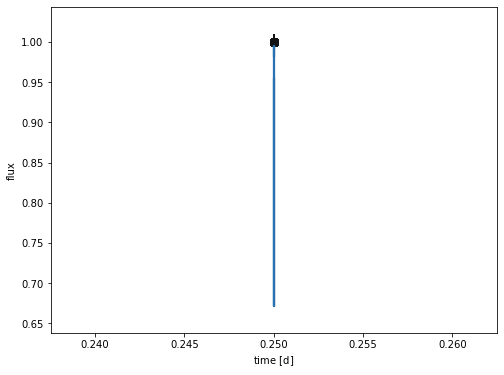

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [16]:
b.plot(show=True)

Well, this was for a single time, wasn't it? It is much more interesting to see the dependence on wavelengths!

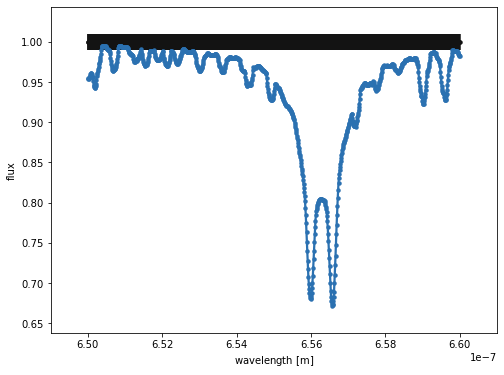

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [17]:
b.plot(x='wavelengths', marker='.', show=True)

Halpha line is sensitive to teff, logg, rvs of binary components. In the model, an integral over mesh is computed, every triangle has its own synthetic spectrum, so the composite spectrum is influenced by rotation, Roche geometry, von Zeipel, or limb darkening.

Note: A 'miniaturized' version of Pyterpol3 (Nemravová et al. 2016, A&A 594, A55) is used internally to interpolate synthetic spectra. Supported grids include: OSTAR, BSTAR, POLLUX, AMBRE, PHOENIX, or POWR. They must be downloaded (http://sirrah.troja.mff.cuni.cz/~mira/xitau/) and present in the `grids` directory.